In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
#pip install pandas_profiling

In [3]:
df = pd.read_csv('Admission_Prediction.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


<AxesSubplot:>

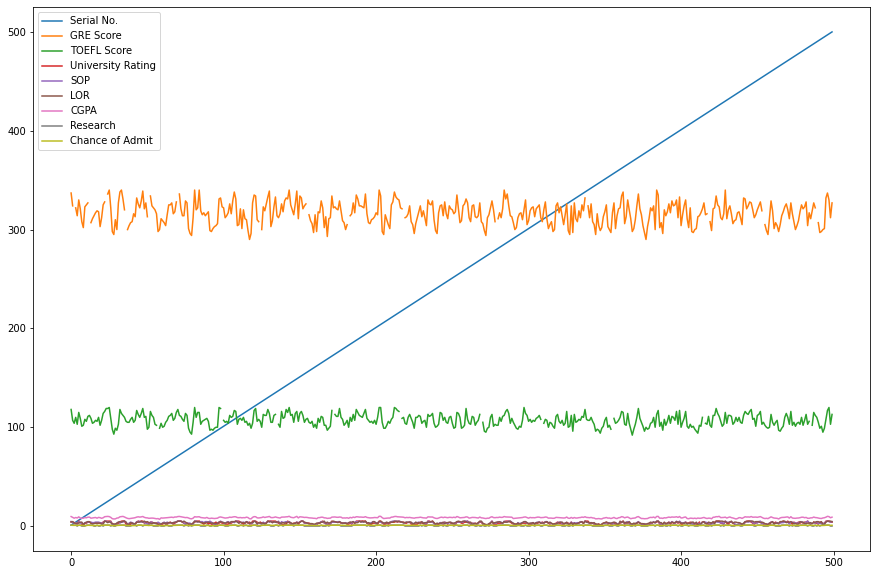

In [5]:
df.plot(figsize=(15,10))

In [6]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
df["GRE Score"].shape

(500,)

In [8]:
df["TOEFL Score"].shape

(500,)

In [9]:
df["University Rating"].shape

(500,)

In [10]:
df["University Rating"].value_counts()

3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: University Rating, dtype: int64

In [11]:
print(df["TOEFL Score"].value_counts())

110.0    42
105.0    37
104.0    29
107.0    28
112.0    27
106.0    26
103.0    25
100.0    24
102.0    24
99.0     22
111.0    20
101.0    19
114.0    18
108.0    18
109.0    18
113.0    18
116.0    16
115.0    11
118.0    10
98.0     10
119.0    10
120.0     9
117.0     8
97.0      7
96.0      6
95.0      3
93.0      2
94.0      2
92.0      1
Name: TOEFL Score, dtype: int64


In [12]:
df["TOEFL Score"].min()

92.0

In [13]:
df["GRE Score"].value_counts()

312.0    22
324.0    22
322.0    17
321.0    17
316.0    17
327.0    17
314.0    16
320.0    16
311.0    16
325.0    15
317.0    15
315.0    13
308.0    13
326.0    12
313.0    12
300.0    12
323.0    12
318.0    12
319.0    12
305.0    11
304.0    11
310.0    10
329.0    10
307.0    10
298.0    10
301.0    10
331.0     9
340.0     9
299.0     8
330.0     8
328.0     8
309.0     8
332.0     7
334.0     7
306.0     7
297.0     6
302.0     6
296.0     5
295.0     5
336.0     5
303.0     5
338.0     4
335.0     4
333.0     4
339.0     3
337.0     2
290.0     2
294.0     2
293.0     1
Name: GRE Score, dtype: int64

In [14]:
df["GRE Score"].min()

290.0

### Using Mean() to Fill Missing Value

In [15]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())

In [16]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [18]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [19]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


### Removing uncessary data

In [20]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


#### Making Dependent Variable(Y) and InDependent Variable(X)

In [25]:
y = df['Chance of Admit']
x = df.drop(columns=['Chance of Admit'])

In [26]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [27]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [28]:
scaler = StandardScaler()
arr=scaler.fit_transform(x)
arr

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

C:\pyver\py_3_9_0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

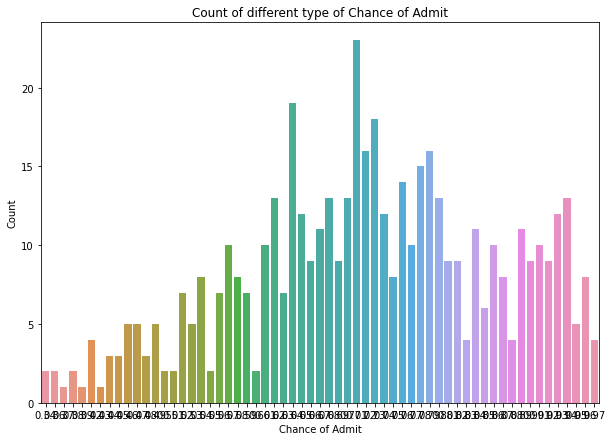

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(df["Chance of Admit"])
plt.title("Count of different type of Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Count")

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=10)

In [46]:
print(x_train.shape, x_test.shape)

(400, 7) (100, 7)


In [47]:
print(y_train.shape, y_test.shape)

(400,) (100,)


In [48]:
Report_adimisson2=df.profile_report()
Report_adimisson2.to_file("ReportAdmission2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_dif = pd.DataFrame()
vif_dif["vif"]=[variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif_dif["features"]=x.columns

In [50]:
vif_dif

,vif,features
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


In [51]:
lr12 = LinearRegression()
lr12.fit(X_train,y_train)
LinearRegression()
lr12.coef_

array([0.00229975, 0.00173041, 0.0046007 , 0.00664235, 0.01449154,
       0.11956687, 0.0239277 ])

In [52]:
lr12.intercept_

-1.3177941160460822

In [53]:
lr12.predict([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

array([0.80715023])

In [54]:
import warnings
warnings.filterwarnings('ignore')
test1 = scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])#test1=scaler.transform(df.iloc[:1,:-1])
test2 = scaler.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])#test2=scaler.transform(df.iloc[1:2,:-1]) 

In [55]:
print(test1)
print(test2)

[[ 0.67081429 -0.03105811  0.77890565  0.63231549  1.09894429  0.48585943
   0.88640526]]
[[1.84274116 1.78854223 0.77890565 1.13735981 1.09894429 1.77680627
  0.88640526]]


In [56]:
lr12.predict(test1)#lr12.predict(test1)

lr12.predict(test2)#lr12.predict(da2)

lr12.score(x_test,y_test)


0.7957504149760897

In [57]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lr12.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [58]:

adj_r2(x_test,y_test)

0.7802096856807921

In [59]:

lassocv = LassoCV(alphas=None,cv= 50 , max_iter=200000, normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=50, max_iter=200000, normalize=True)

In [60]:
lassocv.alpha_

6.3345917977574025e-06

In [61]:
lasso_lr=Lasso(alpha=lassocv.alpha_)
lasso_lr.fit(x_train,y_train)

Lasso(alpha=6.3345917977574025e-06)

In [62]:
lasso_lr.score(x_test,y_test)

0.7957427261976506

In [63]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.28755411, 7.13413229, 5.14882181, 4.48653835, 4.19058778,
       3.23288682, 7.46713905, 3.55485276, 1.19245128, 6.73028638,
       5.55686351, 2.61301457, 9.25720754, 2.81457741, 0.86138327,
       5.72792999, 2.66042273, 8.70062906, 4.56550071, 7.76393976,
       1.71346236, 8.4380763 , 1.18134446, 1.95393935, 2.93926213,
       5.21903459, 4.9139825 , 8.61828594, 9.91796542, 7.08597517,
       8.31212077, 4.54104834, 5.6057706 , 3.79275908, 5.82282984,
       6.99926781, 7.35868227, 8.72500615, 7.78384588, 7.14213894,
       4.48280139, 0.41115545, 1.59613824, 3.73821528, 7.13631683,
       1.52405079, 3.97132055, 8.86356843, 5.23662813, 6.73405612]),
        cv=10, normalize=True)

In [64]:
ridgecv.alpha_

ridge_lr=Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.41115545386210317)

In [65]:
ridge_lr.score(x_test,y_test)

0.7956205526565647

In [66]:
elastic=ElasticNetCV(alphas=None,cv=10)
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [67]:
elastic.l1_ratio_

elastic.alpha_

0.002610652767010311

In [68]:
elastic_lr=ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)
elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=0.002610652767010311)

In [69]:

elastic_lr.score(x_test,y_test)

0.7931267461009195

The score of all model is slightly the same except Elastic , based on my conclusion i will select Ridge as most of the parameter are contributing towards the dependent variable, we would have select Lasso if the vif factor of some are less than 1 as it literaly penalizes the features(if not useful)

In [70]:
import pickle
pickle.dump(ridge_lr,open('finalized_model.pickle','wb'))
model = pickle.load(open('finalized_model.pickle','rb'))

In [71]:
model.predict(test2)

array([-1.05461308])

In [72]:
model.predict(test2)

array([-1.05461308])

In [73]:
model.predict([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

array([0.80720541])

In [74]:
lr12.predict([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

array([0.80715023])

In [75]:
elastic_lr.predict([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

array([0.8044031])